## 1. Defining the Question

### a) Specifying the Data Analytic Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

### c) Understanding the context 

Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. Since the main purpose of thyroid hormone is to "run the body's metabolism," it is understandable that people with this condition will have symptoms associated with a slow metabolism

### d) Recording the Experimental Design



*   upload and read our csv files
*   clean our dataset
*   perfom EDA
*   build our models using decision trees
*   build our models using SVM
*   challenge our solueion




### e) Data Relevance

oue dataset is from this Source [Link]
the dataset contains the following columns

Age

Sex

on_thyroxine

query_on_thyroxine

on_antithyroid_medicationthyroid_surgery

query_hypothyroid

query_hyperthyroid

pregnant

sick

tumor

lithium

goitre

TSH_measured

TSH

T3_measured

T3

TT4_measured

TT4


## 2. Reading the Data

In [0]:
%matplotlib inline

#importing our necessary libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix


In [0]:
# Loading the Data from the source i.e. csv
# ---
health_df = pd.read_csv("/content/hypothyroid.csv")

## 3. Checking the Data

In [7]:
# Determining the no. of records in our dataset
health_df.shape

(3163, 26)

In [8]:
# Previewing the top of our dataset
health_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [9]:
# Previewing the bottom of our dataset
health_df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [0]:
#we have ? in TGB and sex is in capital letters
#we will convert sex to small letters in order for our dataset to be uniform
health_df['sex'] = health_df['sex'].str.lower()

In [11]:
# Checking whether each column has an appropriate datatype
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

## 5. Tidying the Dataset

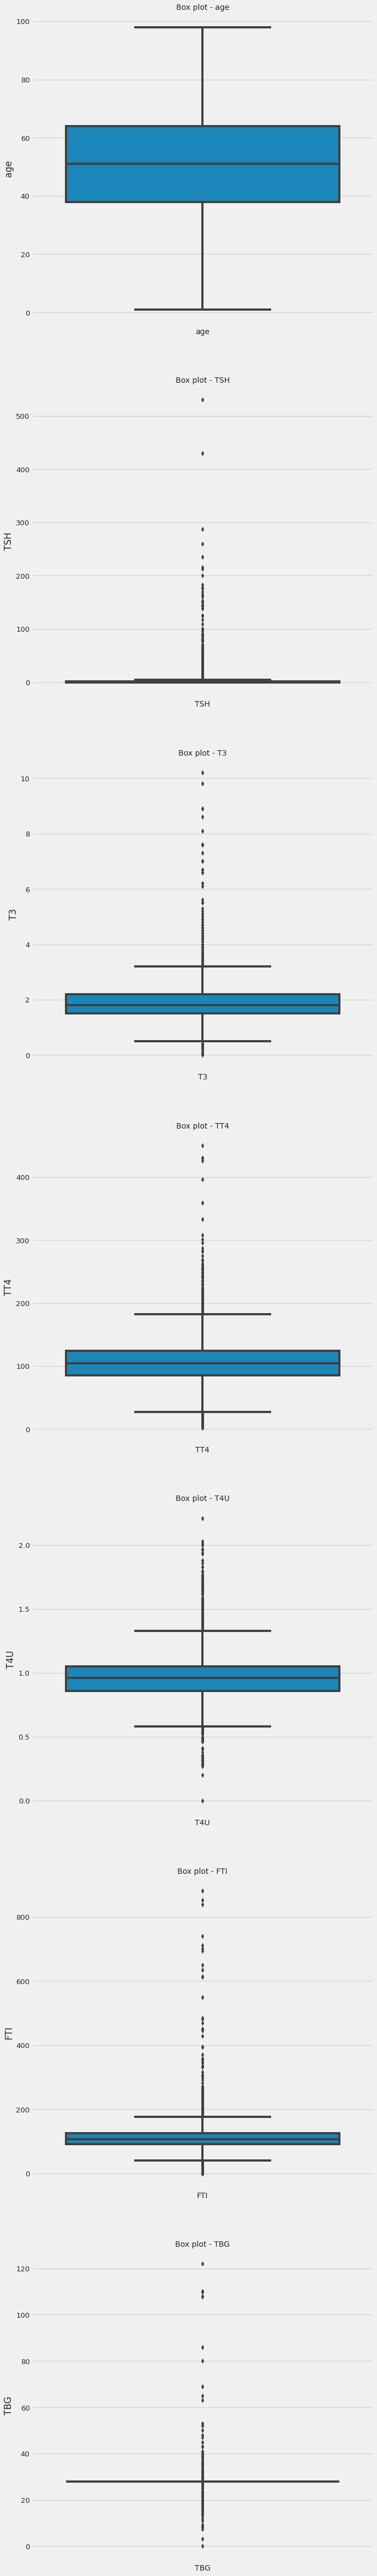

In [55]:
# Checking for Outliers
#
# The plotting is for non binary columns
def plot_boxplots(target_dataframe,col_names):
    
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=14)
        ax[i].set_xlabel(column_name, fontsize=14)
    
    plt.show()
    
    #Execute the function
cols =['age','TSH','T3','TT4','T4U','FTI','TBG']
plt.style.use('fivethirtyeight')
plot_boxplots(health_df,cols)

In [12]:
# Checking for Anomalies
#
health_df.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [13]:
# Identifying the Missing Data
#
health_df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [14]:
# Checking statistical summary of the dataset
health_df.describe(include ='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,f,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [15]:
# checking for duplicated file
#
health_df.duplicated().sum()

77

In [0]:
#removing the duplicated data
health_df.drop_duplicates(inplace = True)

In [17]:
#confirming if we have removed the duplicates
health_df.duplicated().sum()

0

In [0]:
#dealing with null values inform of ?
health_df = health_df.replace(['?'],np.nan)

In [24]:
#testing if it has worked 
health_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,m,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,f,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,m,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,f,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,m,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN


In [32]:
#changing dataset into categorical data
health_df.astype('category').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3086 non-null   category
 1   age                        3086 non-null   category
 2   sex                        3013 non-null   category
 3   on_thyroxine               3086 non-null   category
 4   query_on_thyroxine         3086 non-null   category
 5   on_antithyroid_medication  3086 non-null   category
 6   thyroid_surgery            3086 non-null   category
 7   query_hypothyroid          3086 non-null   category
 8   query_hyperthyroid         3086 non-null   category
 9   pregnant                   3086 non-null   category
 10  sick                       3086 non-null   category
 11  tumor                      3086 non-null   category
 12  lithium                    3086 non-null   category
 13  goitre                     3086 n

In [0]:
health_df['age'] = health_df['age'].astype(float)
health_df['TSH'] = health_df['TSH'].astype(float)
health_df['T3'] = health_df['T3'].astype(float)
health_df['TT4'] = health_df['TT4'].astype(float)
health_df['T4U'] = health_df['T4U'].astype(float)
health_df['FTI'] = health_df['FTI'].astype(float)
health_df['TBG'] = health_df['TBG'].astype(float)

In [34]:
# Identifying the Missing Data
#
health_df.isnull().sum()

#age sex TSH T3 TT4 T4U FTI and TGB have null values

status                          0
age                             0
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

In [0]:
# lets formulate a function to fill the null values since removing them might affect our models

def fillnulls(dataframe_name, column_name,method):
    if method == 'mean':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].mean()))
    elif method=='median':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].median()))
    elif method=='mode':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].median()))

In [0]:
fillnulls(health_df,'age','mean')
#fillnulls(health_df,'sex','mode')
fillnulls(health_df,'TSH','median')
fillnulls(health_df,'T3','median') 
fillnulls(health_df,'TT4','median')
fillnulls(health_df,'T4U','median')
fillnulls(health_df,'FTI','median')
fillnulls(health_df,'TBG','median')


In [38]:
# Identifying the Missing Data
#
health_df.isnull().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
TBG_measured                  0
TBG                           0
dtype: int64

In [39]:
# we will drop null values if any exist
health_df.dropna()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,m,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,28.0
1,hypothyroid,15.0,f,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,28.0
2,hypothyroid,24.0,m,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,28.0
3,hypothyroid,24.0,f,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,28.0
4,hypothyroid,77.0,m,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,f,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,28.0
3159,negative,29.0,f,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,28.0
3160,negative,77.0,m,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,28.0
3161,negative,74.0,f,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,28.0


In [0]:
#we change the string data columns to 1s and 0s 

# 1 implies has hypothyroid  and 0 is negative
health_df['status'].replace(['hypothyroid', 'negative'],[1,0],inplace=True)

# 1 is male, 0 is female
health_df['sex'].replace(['m', 'f'],[1,0],inplace=True)

# 1 is positive and 0 is false
health_df['on_thyroxine'].replace(['t', 'f'],[1,0],inplace=True)
health_df['query_on_thyroxine'].replace(['t', 'f'],[1,0],inplace=True)
health_df['on_antithyroid_medication'].replace(['t', 'f'],[1,0],inplace=True)
health_df['thyroid_surgery'].replace(['t', 'f'],[1,0],inplace=True)
health_df['query_hypothyroid'].replace(['t', 'f'],[1,0],inplace=True)
health_df['query_hyperthyroid'].replace(['t', 'f'],[1,0],inplace=True)
health_df['pregnant'].replace(['t', 'f'],[1,0],inplace=True)
health_df['sick'].replace(['t', 'f'],[1,0],inplace=True)
health_df['tumor'].replace(['t', 'f'],[1,0],inplace=True)
health_df['lithium'].replace(['t', 'f'],[1,0],inplace=True)
health_df['goitre'].replace(['t', 'f'],[1,0],inplace=True)

# 1 is yes and 0 is n
health_df['TSH_measured'].replace(['y', 'n'],[1,0],inplace=True)
health_df['T3_measured'].replace(['y', 'n'],[1,0],inplace=True)
health_df['TT4_measured'].replace(['y', 'n'],[1,0],inplace=True)
health_df['T4U_measured'].replace(['y', 'n'],[1,0],inplace=True)
health_df['FTI_measured'].replace(['y', 'n'],[1,0],inplace=True)
health_df['TBG_measured'].replace(['y', 'n'],[1,0],inplace=True)



In [41]:
health_df

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,72.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,28.0
1,1,15.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,28.0
2,1,24.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,28.0
3,1,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,28.0
4,1,77.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0,58.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,5.8,1,1.7,1,86.0,1,0.91,1,95.0,0,28.0
3159,0,29.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0.8,1,1.8,1,99.0,1,1.01,1,98.0,0,28.0
3160,0,77.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,0.6,1,71.0,1,0.68,1,104.0,0,28.0
3161,0,74.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1,0.1,1,65.0,1,0.48,1,137.0,0,28.0


## 6. Analysis

**Exploratory data Analysis**

In [42]:
# Let's display the correlations between the variables
correlations = health_df.corr()

correlations

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
status,1.000000,0.029975,-0.014697,-0.036975,-0.029475,-0.012309,0.045738,0.048344,-0.021865,-0.019924,-0.021630,-0.025074,-0.005572,-0.003453,0.086617,0.591362,0.067653,-0.180703,0.063541,-0.373924,0.063397,0.086475,0.063254,-0.308800,-0.048075,-0.008107
age,0.029975,1.000000,0.006294,0.000451,-0.019781,-0.059541,-0.012432,0.043156,-0.087005,-0.157715,0.063078,-0.063738,-0.021559,-0.036387,0.202788,0.009182,0.176984,-0.253882,0.126822,-0.082548,0.124476,-0.186048,0.125048,0.022622,-0.129292,-0.063778
sex,-0.014697,0.006294,1.000000,-0.123022,0.052540,-0.021454,-0.044273,-0.066322,-0.056790,-0.092586,0.022816,-0.005514,-0.016740,-0.092252,0.033738,-0.032547,0.101804,-0.064013,0.091380,-0.164621,0.090754,-0.227093,0.092845,-0.047582,-0.092845,-0.052298
on_thyroxine,-0.036975,0.000451,-0.123022,1.000000,-0.013574,-0.024418,0.031370,0.066144,-0.086734,0.001219,-0.063480,-0.022658,-0.010467,-0.025874,0.069553,0.000423,-0.161697,0.012892,0.057418,0.218871,0.057030,0.072426,0.060094,0.115617,-0.061614,-0.018834
query_on_thyroxine,-0.029475,-0.019781,0.052540,-0.013574,1.000000,-0.015823,0.015876,-0.020206,-0.038674,-0.019129,-0.024267,0.049524,-0.003430,0.004078,-0.109774,-0.023564,-0.087931,-0.020724,0.039118,-0.019134,0.039030,-0.033888,0.038941,-0.003130,-0.040082,-0.006016
on_antithyroid_medication,-0.012309,-0.059541,-0.021454,-0.024418,-0.015823,1.000000,-0.006256,-0.033724,0.124440,0.003412,-0.021160,-0.013461,-0.002991,-0.021048,-0.030035,-0.003487,-0.018524,0.064307,-0.049433,-0.004198,-0.049670,0.025398,-0.049909,-0.019738,0.046900,-0.003745
thyroid_surgery,0.045738,-0.012432,-0.044273,0.031370,0.015876,-0.006256,1.000000,0.001065,0.021470,-0.013427,-0.033475,-0.021294,-0.004732,-0.022904,0.036567,0.015103,0.007382,-0.006525,0.006806,-0.015920,0.006594,0.026214,0.006381,-0.025835,-0.009091,-0.020237
query_hypothyroid,0.048344,0.043156,-0.066322,0.066144,-0.020206,-0.033724,0.001065,1.000000,-0.017942,-0.014439,-0.051720,-0.032900,0.040694,-0.023296,0.050476,0.070798,-0.024222,-0.040453,0.037754,-0.009840,0.037478,0.045194,0.037202,-0.044778,-0.040733,-0.018001
query_hyperthyroid,-0.021865,-0.087005,-0.056790,-0.086734,-0.038674,0.124440,0.021470,-0.017942,1.000000,0.073329,-0.051720,-0.032900,-0.007311,0.040038,-0.135600,-0.033873,-0.036012,0.166676,-0.094539,0.128255,-0.095068,0.067951,-0.095600,0.059493,0.106757,0.021111
pregnant,-0.019924,-0.157715,-0.092586,0.001219,-0.019129,0.003412,-0.013427,-0.014439,0.073329,1.000000,-0.025581,0.004308,-0.003616,0.081827,0.006526,-0.011843,0.030561,0.203501,-0.002225,0.171097,-0.002402,0.323201,-0.002579,-0.005512,0.000328,0.086504


In [0]:
num_cols = health_df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']]

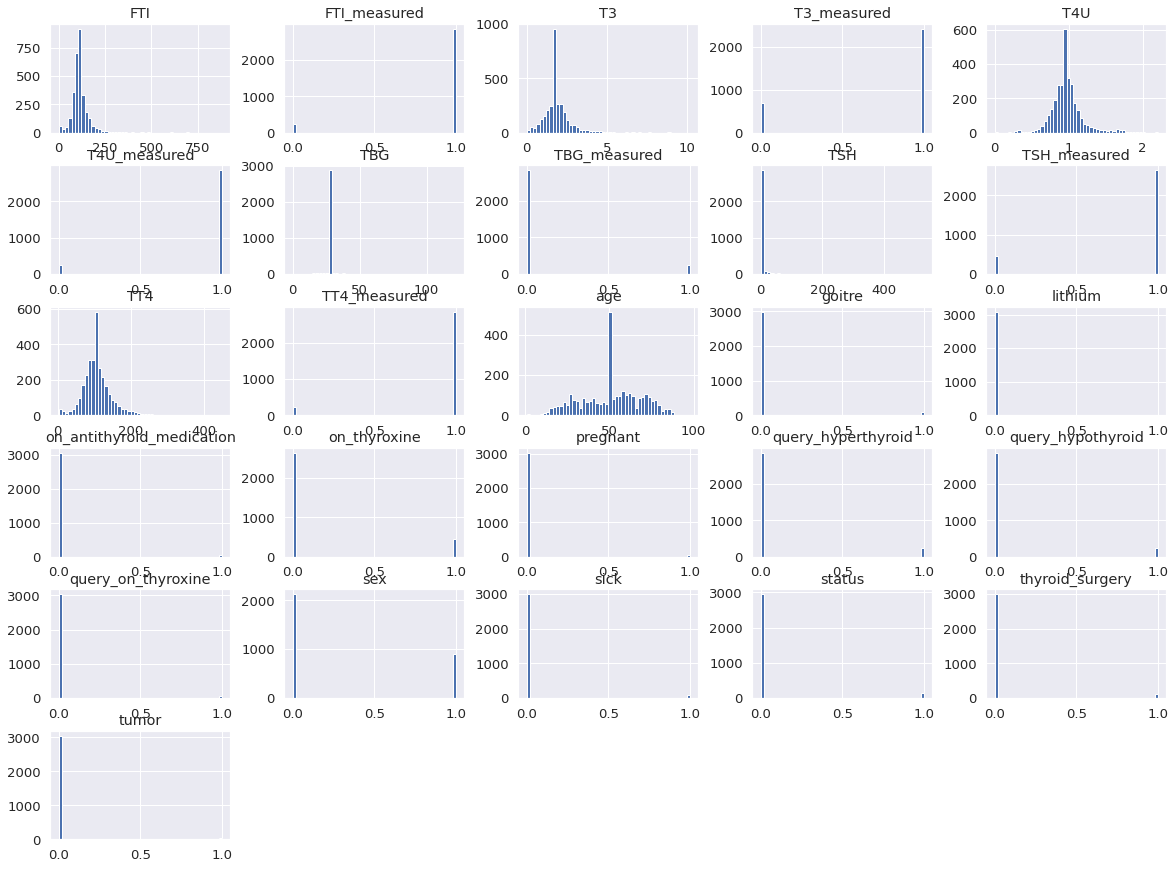

In [44]:
#Distribution plot
health_df.hist(bins=50,figsize=(20,15))
plt.show()

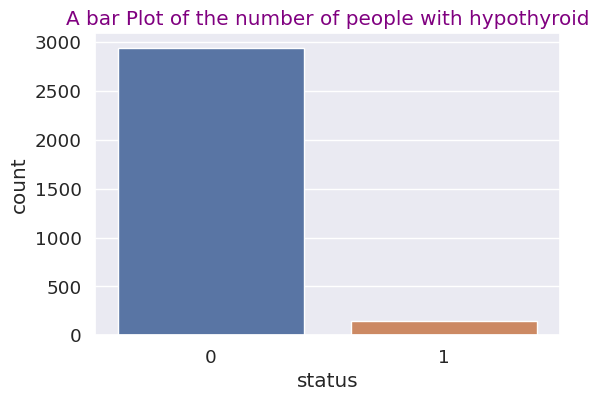

In [45]:
plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(health_df.status)
plt.title('A bar Plot of the number of people with hypothyroid', color = 'purple')
plt.show()

#people tested negative are many than that with hypothyroid

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Text(0.5, 1.0, 'Histogram showing ')

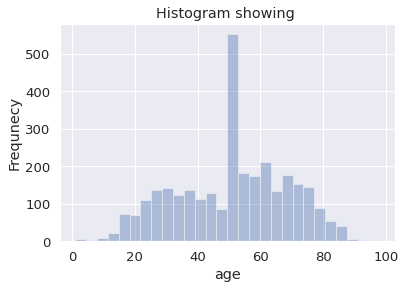

In [46]:
#Histogram to show relationship between 
df = health_df[health_df.status == '1']
sns.distplot(health_df['age'],  kde=False,label='Yes')
plt.ylabel('Frequnecy')
plt.title('Histogram showing ')

#people tested positive are around 50

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Text(0.5, 1.0, 'Histogram showing ')

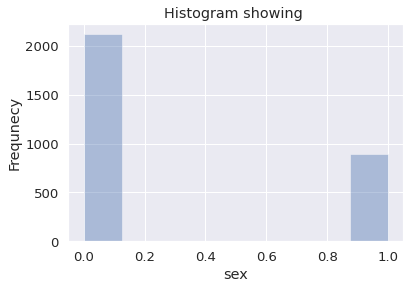

In [47]:
#Histogram to show relationship between 
df = health_df[health_df.status == '1']
sns.distplot(health_df['sex'],  kde=False,label='Yes')
plt.ylabel('Frequnecy')
plt.title('Histogram showing ')

#females are affected more than men

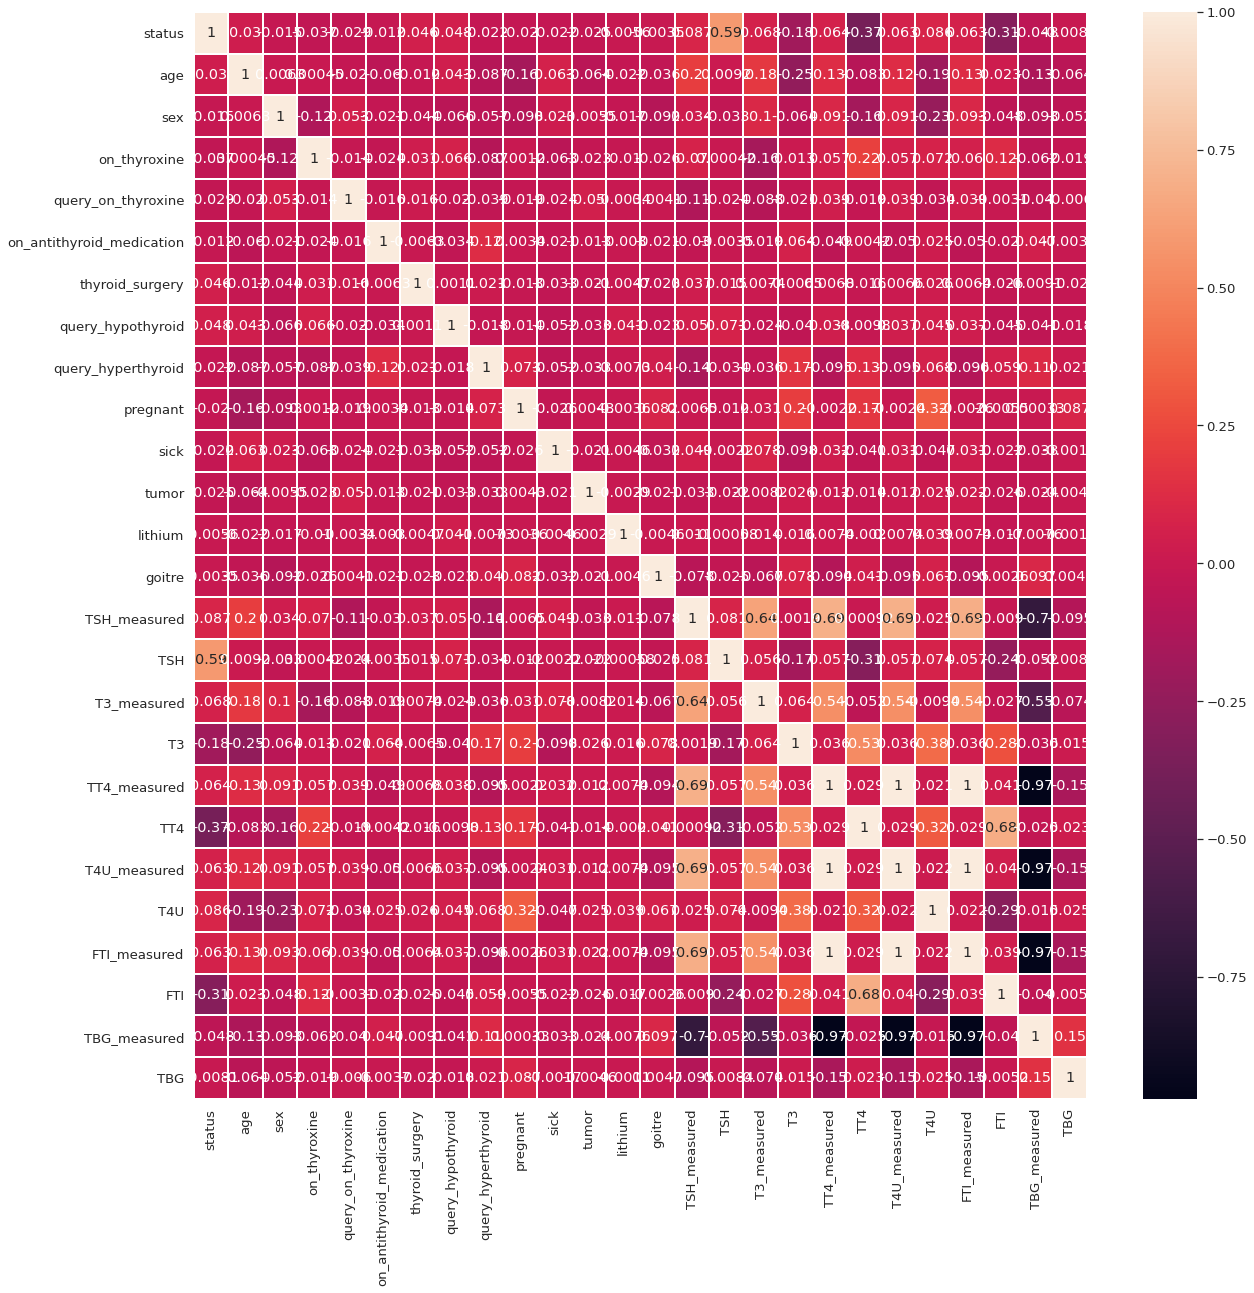

In [51]:
# Create a correlation matrix
corrMatrix = health_df.corr()
corrMatrix

# Vizualise the correlation matrix using a heat map

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=1, ax=ax)

**Part 1: Decision trees:**


In [52]:
health_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

Random forests

In [62]:
# Split the independent and dependent variables
y = health_df['status'].values

test_features = health_df.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
# Updated the features based on importance
test_features = ['TSH', 'FTI', 'T3', 'T4U', 'TSH_measured', 'TT4', 'age']
X = health_df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,618.000000,618.000000
mean,0.040453,0.041255
std,0.197179,0.178231
min,0.000000,0.000154
25%,0.000000,0.000154
50%,0.000000,0.000154
75%,0.000000,0.000154
max,1.000000,0.985326


Let's assess how well our random forest is doing.

In [63]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.013504251304780985
Mean Squared Error: 0.005666502254950684
Root Mean Squared Error: 0.07527617322201417


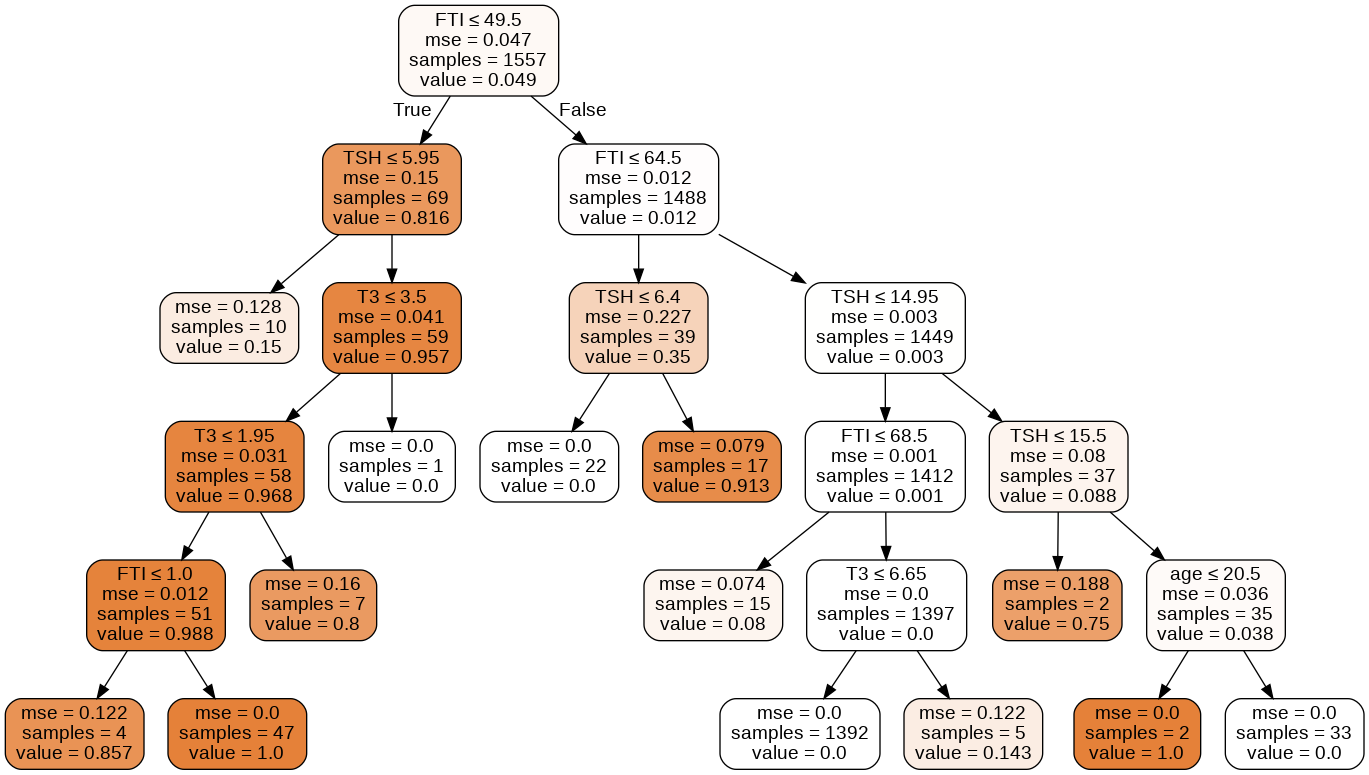

In [64]:

## Check the performance of sample tree output
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_tree.png')
Image(graph.create_png())

In [65]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('TSH', 0.24), ('FTI', 0.73), ('T3', 0.01), ('T4U', 0.0), ('TSH_measured', 0.0), ('TT4', 0.0), ('age', 0.02)]

Variable: FTI                  Importance: 0.73
Variable: TSH                  Importance: 0.24
Variable: age                  Importance: 0.02
Variable: T3                   Importance: 0.01
Variable: T4U                  Importance: 0.0
Variable: TSH_measured         Importance: 0.0
Variable: TT4                  Importance: 0.0


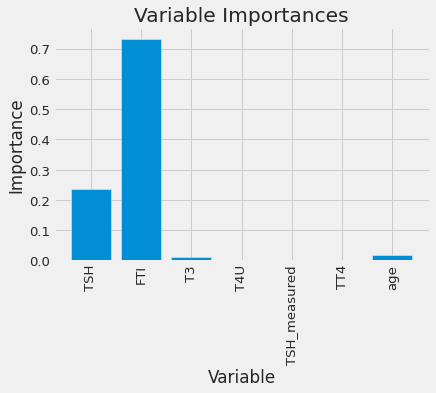

In [66]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Ada boosted trees

In [73]:
y = health_df['status'].values.reshape(-1,1)

test_features = health_df.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
# Updated the features based on importance
test_features = ['TSH', 'FTI', 'T3', 'T4U', 'TSH_measured', 'TT4', 'age']
X = health_df[test_features].values

print(y.shape)
print(X.shape)

(3086, 1)
(3086, 7)


In [0]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tree = DecisionTreeRegressor(max_depth=4)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained, note that we apply it to the whole data set this time
y_pred_tree = tree.predict(X)

Let's show the results of our tree's predictions on the plt

In [0]:
# Let's visualize what the data looks like
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()


Ada boosted trees

In [0]:
tree = DecisionTreeRegressor(max_depth=4)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained, note that we apply it to the whole data set this time
y_pred_tree = tree.predict(X)

In [0]:
# Let's visualize what the data looks like
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

In [0]:
# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                          n_estimators=300, random_state=42)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)

# 
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree", linewidth=2)
plt.plot(X, y_pred_ada, c="g", label="ada 300", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

In [0]:
a = accuracy_score(y_test, y_pred)
print('Accuracy', a)

gradient boosted trees

In [0]:
target_number_of_trees = 300

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X)

plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree", linewidth=4)
plt.plot(X, y_pred_ada, c="g", label="ada 300", linewidth=4)
plt.plot(X, y_pred_gbr, c="b", label="gbr 300")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

In [0]:
a = accuracy_score(y_test, y_pred)
print('Accuracy', a)

**Part 2: SVM:**

 Polynomial

In [77]:
# Split the independent and dependent variables
y = health_df['status'].values

test_features = health_df.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
# Updated the features based on importance
test_features = ['TSH', 'FTI', 'T3', 'T4U', 'TSH_measured', 'TT4', 'age']
health = health_df[test_features].values

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(health)
X = pca.transform(health)
X.shape

(3086, 2)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

In [0]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [0]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [0]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

 linear

In [0]:
# Split the independent and dependent variables
y = health_df['status'].values

test_features = health_df.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
# Updated the features based on importance
test_features = ['TSH', 'FTI', 'T3', 'T4U', 'TSH_measured', 'TT4', 'age']
X = health_df[test_features].values

In [0]:
# Let's now build the svm model 
l_model = SVC(kernel = 'linear')
# Train the model using the training set
l_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred_l = l_model.predict(X_test)

In [0]:
# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred_l)
model_accuracy

# We've gotten a classification rate of 98%. This is a pretty good accuracy score 



In [0]:
# For further evaluation you can also check the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

rbf kernel

In [0]:
# Removing the target column
health = health_df.drop('status', axis=1)
y = health_df['status']

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(health)
X = pca.transform(health)
X.shape

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

In [0]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [0]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [0]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

## 7. Implementing the Solution

In [0]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [0]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?